In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('output/translated_cleaned.csv')
df.head()

,full_text,username,created_at,cleaned,case_fold,token,stop,stemmed,second_cleaned,translated
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,unit of landed house for ministers office has ...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,Thank God
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,very critical of conglomerate projects support...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,wow
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,when the drone rolls off the PLN transformer i...


In [5]:
data_tweet = list(df['translated'])
polarity = 0

status = []
total_positive = total_negative = total_neutral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polarity += analysis.polarity
  
  if analysis.sentiment.polarity > 0.0:
    total_positive += 1
    status.append('Positive')
  elif analysis.sentiment.polarity == 0.0:
    total_neutral += 1
    status.append('Neutral')
  else:
    total_negative += 1
    status.append('Negative')
  
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positive}\nNetral = {total_neutral}\nNegatif = {total_negative}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 926
Netral = 1207
Negatif = 185

Total Data : 2318


In [7]:
df['Classification'] = status
df

,full_text,username,created_at,cleaned,case_fold,token,stop,stemmed,second_cleaned,translated,Classification
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,unit of landed house for ministers office has ...,Negative
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,Thank God,Neutral
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,very critical of conglomerate projects support...,Positive
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,wow,Positive
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,when the drone rolls off the PLN transformer i...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
2313,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,consulting_sf,Wed May 24 06:08:13 +0000 2023,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,otoritas ikn kebut loi investasi swasta mulai...,"['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...",otoritas ikn kebut loi investasi swasta mulai ...,BIKN authorities speed up private investment l...,Positive
2314,Indonesia Kantongi 29 Komitmen Investasi IKN D...,consulting_sf,Tue May 23 05:34:26 +0000 2023,Indonesia Kantongi 29 Komitmen Investasi IKN D...,indonesia kantongi komitmen investasi ikn dar...,"['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantong', 'komitmen', 'investas...",indonesia kantong komitmen investasi ikn jepan...,BIndonesia bags Japans IKN investment commitme...,Positive
2315,Pemerintah mengaku telah mempersiapkan fasilit...,DDTCNews,Mon May 22 04:57:27 +0000 2023,Pemerintah mengaku telah mempersiapkan fasilit...,pemerintah mengaku telah mempersiapkan fasilit...,"['pemerintah', 'mengaku', 'telah', 'mempersiap...","['pemerintah', 'mengaku', 'mempersiapkan', 'fa...","['perintah', 'aku', 'siap', 'fasilitas', 'paja...",perintah aku siap fasilitas paja sifat seluruh...,border,Neutral
2316,"Hari Terakhir, Cara Vote Logo IKN Nusantara, K...",tribunkaltim,Sat May 20 10:25:49 +0000 2023,Hari Terakhir Cara Vote Logo IKN Nusantara Kes...,hari terakhir cara vote logo ikn nusantara kes...,"['hari', 'terakhir', 'cara', 'vote', 'logo', '...","['hari', 'terakhir', 'cara', 'vote', '

# Visualisasi

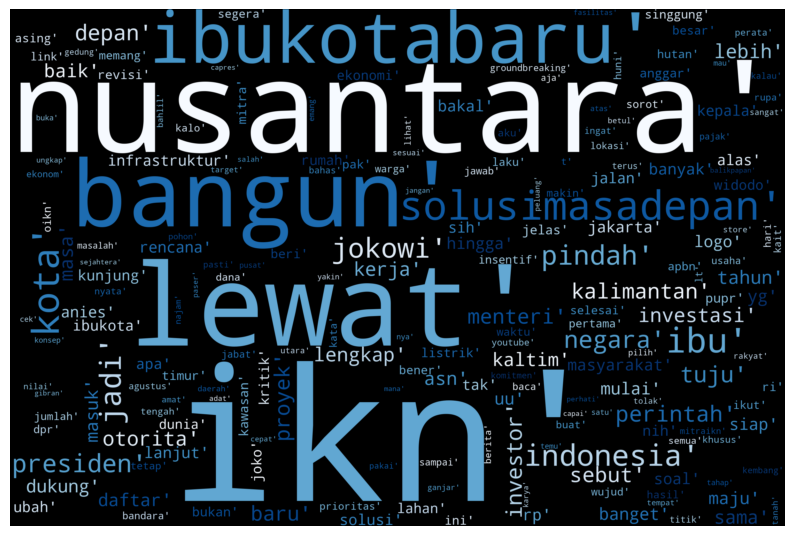

In [9]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in df['stemmed']])
wordcloud = WordCloud(
  width=3000,
  height=2000,
  random_state=3,
  background_color='black',
  colormap='Blues_r',
  collocations=False,
  stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

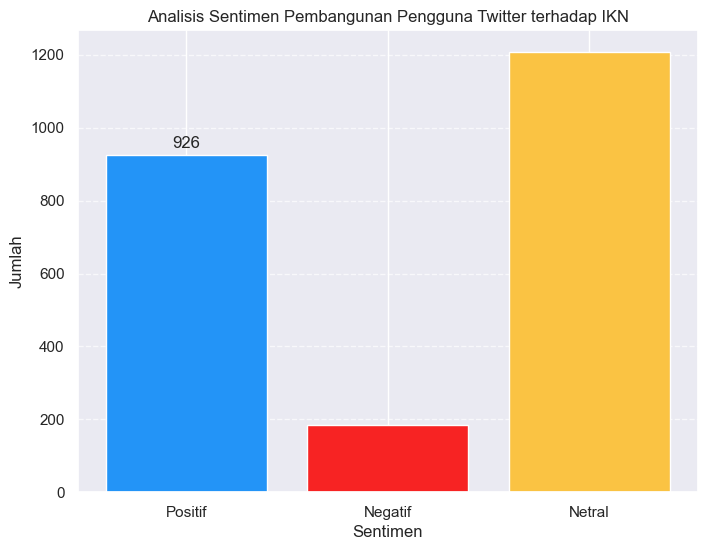

In [11]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positive, total_negative, total_neutral]
def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])
  
  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()

show_bar_chart(labels, counts, "Analisis Sentimen Pembangunan Pengguna Twitter terhadap IKN")
    

# Klasifikasi Sentimen

In [12]:
df

,full_text,username,created_at,cleaned,case_fold,token,stop,stemmed,second_cleaned,translated,Classification
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,unit of landed house for ministers office has ...,Negative
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,Thank God,Neutral
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,very critical of conglomerate projects support...,Positive
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,wow,Positive
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,when the drone rolls off the PLN transformer i...,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
2313,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,consulting_sf,Wed May 24 06:08:13 +0000 2023,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,otoritas ikn kebut loi investasi swasta mulai...,"['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...",otoritas ikn kebut loi investasi swasta mulai ...,BIKN authorities speed up private investment l...,Positive
2314,Indonesia Kantongi 29 Komitmen Investasi IKN D...,consulting_sf,Tue May 23 05:34:26 +0000 2023,Indonesia Kantongi 29 Komitmen Investasi IKN D...,indonesia kantongi komitmen investasi ikn dar...,"['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantong', 'komitmen', 'investas...",indonesia kantong komitmen investasi ikn jepan...,BIndonesia bags Japans IKN investment commitme...,Positive
2315,Pemerintah mengaku telah mempersiapkan fasilit...,DDTCNews,Mon May 22 04:57:27 +0000 2023,Pemerintah mengaku telah mempersiapkan fasilit...,pemerintah mengaku telah mempersiapkan fasilit...,"['pemerintah', 'mengaku', 'telah', 'mempersiap...","['pemerintah', 'mengaku', 'mempersiapkan', 'fa...","['perintah', 'aku', 'siap', 'fasilitas', 'paja...",perintah aku siap fasilitas paja sifat seluruh...,border,Neutral
2316,"Hari Terakhir, Cara Vote Logo IKN Nusantara, K...",tribunkaltim,Sat May 20 10:25:49 +0000 2023,Hari Terakhir Cara Vote Logo IKN Nusantara Kes...,hari terakhir cara vote logo ikn nusantara kes...,"['hari', 'terakhir', 'cara', 'vote', 'logo', '...","['hari', 'terakhir', 'cara', 'vote', '

In [17]:
dataset = df.drop(['full_text', 'username', 'created_at', 'cleaned',	'case_fold',	'token', 'stop',	'stemmed',	'second_cleaned'	], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [18]:
import random

set_positive = []
set_negative = []
set_neutral = []

for n in dataset:
  if(n[1] == 'Positive'):
    set_positive.append(n)
  elif(n[1] == 'Negative'):
    set_negative.append(n)
  else:
    set_neutral.append(n)

set_positive = random.sample(set_positive, k=int(len(set_positive)/2))
set_negative = random.sample(set_negative, k=int(len(set_negative)/2))
set_neutral = random.sample(set_neutral, k=int(len(set_neutral)/2))

train = set_positive + set_negative + set_neutral
train_set = []

for n in train:
  train_set.append(n)

In [19]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Accuracy Test: ", cl.accuracy(dataset))

Accuracy Test:  0.8925798101811907


# Labelling Naive Bayes

In [20]:
data_tweet = list(df['translated'])
polarity = 0

status = []
total_positive = total_negative = total_neutral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)
  if analysis.classify() == 'Positive':
    total_positive += 1
  elif analysis.classify() == 'Neutral':
    total_neutral += 1
  else:
    total_negative += 1

  status.append(analysis.classify())
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positive}\nNetral = {total_neutral}\nNegatif = {total_negative}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 910
Netral = 1315
Negatif = 93

Total Data : 2318


In [21]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
df['Bayes Classification'] = status

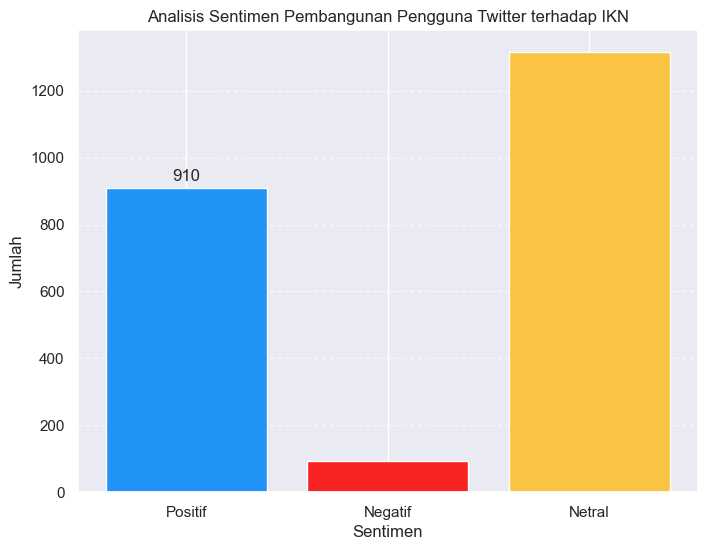

In [22]:
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positive, total_negative, total_neutral]
def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])
  
  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()

show_bar_chart(labels, counts, "Analisis Sentimen Pembangunan Pengguna Twitter terhadap IKN")

In [23]:
df

,full_text,username,created_at,cleaned,case_fold,token,stop,stemmed,second_cleaned,translated,Classification,Bayes Classification
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,unit of landed house for ministers office has ...,Negative,Neutral
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,Thank God,Neutral,Neutral
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,very critical of conglomerate projects support...,Positive,Positive
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,wow,Positive,Neutral
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,when the drone rolls off the PLN transformer i...,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2313,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,consulting_sf,Wed May 24 06:08:13 +0000 2023,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,otoritas ikn kebut loi investasi swasta mulai...,"['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...",otoritas ikn kebut loi investasi swasta mulai ...,BIKN authorities speed up private investment l...,Positive,Positive
2314,Indonesia Kantongi 29 Komitmen Investasi IKN D...,consulting_sf,Tue May 23 05:34:26 +0000 2023,Indonesia Kantongi 29 Komitmen Investasi IKN D...,indonesia kantongi komitmen investasi ikn dar...,"['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantong', 'komitmen', 'investas...",indonesia kantong komitmen investasi ikn jepan...,BIndonesia bags Japans IKN investment commitme...,Positive,Positive
2315,Pemerintah mengaku telah mempersiapkan fasilit...,DDTCNews,Mon May 22 04:57:27 +0000 2023,Pemerintah mengaku telah mempersiapkan fasilit...,pemerintah mengaku telah mempersiapkan fasilit...,"['pemerintah', 'mengaku', 'telah', 'mempersiap...","['pemerintah', 'mengaku', 'mempersiapkan', 'fa...","['perintah', 'aku', 'siap', 'fasilitas', 'paja...",perintah aku siap fasilitas paja sifat seluruh...,border,Neutral,Neutral
2316,"Hari Terakhir, Cara Vote Logo IKN Nusantara, K...",tribunkaltim,Sat May 20 10:25:49 +0000 2023,Hari Terakhir Cara Vote Logo IKN Nusantara Kes...,hari terakhir cara vote logo ikn nusantara kes...